<a href="https://www.kaggle.com/code/nabilahafrinshwati/obesity-risk-analysis?scriptVersionId=167823852" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# 1. Import libraries

In [1]:
!pip install ptitprince

  Preparing metadata (setup.py) ... - \ done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 283.1/283.1 kB 4.2 MB/s eta 0:00:00
  Created wheel for ptitprince: filename=ptitprince-0.2.7-py3-none-any.whl size=10655 sha256=d54cb50676bdd31dfd82085b3db123d1845df0b486570ca8dc9fc0a6ff9141fd
  Stored in directory: /root/.cache/pip/wheels/0e/43/31/e76a3bf61865543f076a9d9eb027a740caefb379424ecba4e8
Successfully built ptitprince
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.12.2
    Uninstalling seaborn-0.12.2:
      Successfully uninstalled seaborn-0.12.2


In [2]:
%%capture
import ptitprince as pt
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import squarify
%matplotlib inline

import warnings 
warnings.filterwarnings('ignore')

import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout
from keras.layers import LeakyReLU,PReLU,ELU
from tensorflow.keras.utils import to_categorical
from keras.callbacks import EarlyStopping

from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

2024-03-19 15:23:27.429603: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-19 15:23:27.429750: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-19 15:23:27.578471: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# 2. Import Data

In [3]:
title_font = {'fontname': 'serif'}
label_font = {'fontname': 'monospace'}

In [4]:
df_train = pd.read_csv('/kaggle/input/playground-series-s4e2/train.csv')
original = pd.read_csv('/kaggle/input/obesity-or-cvd-risk-classifyregressorcluster/ObesityDataSet.csv')
df_test = pd.read_csv('/kaggle/input/playground-series-s4e2/test.csv')

In [5]:
#Let's check the Shape of data
print(f'The Train dataset has {df_train.shape[0]} rows and {df_train.shape[1]} columns')
print(f'The Test dataset has {df_test.shape[0]} rows and {df_test.shape[1]} columns')
print(f"The Original dataset hss {original.shape[0]} rows and {original.shape[1]} columns")

The Train dataset has 20758 rows and 18 columns
The Test dataset has 13840 rows and 17 columns
The Original dataset hss 2111 rows and 17 columns


## 2.1. Original Data

In [6]:
original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [7]:
original.describe().style.background_gradient(cmap='YlOrRd', axis=1)

## 2.2. Training Data

In [8]:
#Let's check the samples of data
display('Train:',df_train.sample(15))
# display('Test:',df_test.head())

'Train:'

id  Gender        Age    Height      Weight  \
8843    8843  Female  21.000000  1.600000   63.000000   
19259  19259  Female  25.968792  1.678658  104.810024   
3544    3544    Male  33.049121  1.666710  103.605896   
19607  19607  Female  21.020640  1.650000   88.126544   
5491    5491    Male  29.438790  1.700000   92.860254   
6169    6169    Male  23.803904  1.827279  105.000000   
378      378  Female  26.000000  1.633020  111.856492   
14055  14055    Male  28.255199  1.774983  112.776612   
10361  10361  Female  19.000000  1.600000   45.000000   
17972  17972  Female  25.957740  1.624140  110.105890   
20445  20445    Male  19.000000  1.820000   70.000000   
1173    1173  Female  19.816949  1.641918   49.650897   
19443  19443    Male  23.000000  1.780000   95.000000   
447      447    Male  21.727380  1.792435   89.754302   
9725    9725    Male  55.000000  1.700000   80.000000   

      family_history_with_overweight FAVC      FCVC       NCP        CAEC  \
8843                             yes  yes  3.000000  3.000000   Sometimes   
19259                            yes  yes  3.000000  3.000000   Sometimes   
3544                             yes  yes  2.000000  2.996444   Sometimes   
19607                            yes  yes  2.000000  1.000000   Sometimes   
5491                             yes  yes  2.000000  3.000000   Sometimes   
6169                             yes  yes  2.000000  3.000000   Sometimes   
378                              yes  yes  3.000000  3.000000   Sometimes   
14055                            yes  yes  1.572036  3.000000   Sometimes   
10361                             no  yes  3.000000  3.000000  Frequently   
17972                            yes  yes  3.000000  3.000000   Sometimes   
20445                            yes  yes  3.000000  1.000000   Sometimes   
1173                              no  yes  2.824559  3.392811   Sometimes   
19443                            yes  yes  3.000000  3.000000  Frequently   
447                              yes  yes  2.000000  3.000000   Sometimes   
9725                             yes  yes  2.000000  1.000000   Sometimes   

      SMOKE      CH2O  SCC       FAF       TUE        CALC  \
8843     no  3.000000  yes  3.000000  1.000000   Sometimes   
19259    no  1.666160   no  0.162279  0.737226   Sometimes   
3544     no  1.000000   no  1.666965  0.000000   Sometimes   
19607    no  2.115967   no  1.666390  1.460564          no   
5491     no  1.163264   no  1.862235  1.000000  Frequently   
6169     no  2.000000   no  0.000000  1.000000   Sometimes   
378      no  2.784303   no  0.000000  0.097760   Sometimes   
14055    no  2.000000   no  0.000000  0.630866   Sometimes   
10361    no  2.000000   no  1.000000  0.000000   Sometimes   
17972    no  1.067716   no  0.030541  0.444532   Sometimes   
20445    no  2.000000   no  3.000000  1.000000   Sometimes   
1173     no  1.542490   no  2.000000  1.000000   Sometimes   
19443    no  3.000000   no  3.000000  2.000000  Frequently   
447      no  1.302193   no  0.000000  0.966181   Sometimes   
9725     no  2.000000   no  1.000000  1.000000          no   

                      MTRANS           NObeyesdad  
8843   Public_Transportation   Overweight_Level_I  
19259  Public_Transportation     Obesity_Type_III  
3544              Automobile      Obesity_Type_II  
19607  Public_Transportation       Obesity_Type_I  
5491              Automobile       Obesity_Type_I  
6169   Public_Transportation       Obesity_Type_I  
378    Public_Transportation     Obesity_Type_III  
14055             Automobile      Obesity_Type_II  
10361  Public_Transportation  Insufficient_Weight  
17972  Public_Transportation     Obesity_Type_III  
20445  Public_Transportation        Normal_Weight  
1173   Public_Transportation  Insufficient_Weight  
19443             Automobile       Obesity_Type_I  
447    Public_Transportation   Overweight_Level_I  
9725              Automobile  Overweight_Level_II

In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

**Both the Original data and the train data has similar statistical characteristics**

In [10]:
df_train.describe()

id           Age        Height        Weight          FCVC  \
count  20758.00000  20758.000000  20758.000000  20758.000000  20758.000000   
mean   10378.50000     23.841804      1.700245     87.887768      2.445908   
std     5992.46278      5.688072      0.087312     26.379443      0.533218   
min        0.00000     14.000000      1.450000     39.000000      1.000000   
25%     5189.25000     20.000000      1.631856     66.000000      2.000000   
50%    10378.50000     22.815416      1.700000     84.064875      2.393837   
75%    15567.75000     26.000000      1.762887    111.600553      3.000000   
max    20757.00000     61.000000      1.975663    165.057269      3.000000   

                NCP          CH2O           FAF           TUE  
count  20758.000000  20758.000000  20758.000000  20758.000000  
mean       2.761332      2.029418      0.981747      0.616756  
std        0.705375      0.608467      0.838302      0.602113  
min        1.000000      1.000000      0.000000      0.000000  
25%        3.000000      1.792022      0.008013      0.000000  
50%        3.000000      2.000000      1.000000      0.573887  
75%        3.000000      2.549617      1.587406      1.000000  
max        4.000000      3.000000      3.000000      2.000000

In [11]:
info = pd.concat([df_train.count(),original.count()],axis=1, keys=['df_train', 'original'])
print(info)

                                df_train  original
id                                 20758       NaN
Gender                             20758    2111.0
Age                                20758    2111.0
Height                             20758    2111.0
Weight                             20758    2111.0
family_history_with_overweight     20758    2111.0
FAVC                               20758    2111.0
FCVC                               20758    2111.0
NCP                                20758    2111.0
CAEC                               20758    2111.0
SMOKE                              20758    2111.0
CH2O                               20758    2111.0
SCC                                20758    2111.0
FAF                                20758    2111.0
TUE                                20758    2111.0
CALC                               20758    2111.0
MTRANS                             20758    2111.0
NObeyesdad                         20758    2111.0


**Both the Original data and the train data has similar statistical characteristics**

In [12]:
df_train.drop(columns=["id"], inplace=True)

In [13]:
def rename(dataframe):
    new_column_names = {
    'Gender': 'Gender',
    'Age': 'Age',
    'Height': 'Height',
    'Weight': 'Weight',
    'family_history_with_overweight': 'Fam_history',
    'FAVC': 'Caloric_food',
    'FCVC': 'Veg',
    'NCP': 'Main_meals',
    'CAEC': 'Foods_betwn_meals',
    'SMOKE': 'Smoker',
    'CH2O': 'Water_consume',
    'SCC': 'Calories_monitored',
    'FAF': 'Physical_activity',
    'TUE': 'Tech_addict',
    'CALC': 'Alcohol_consume',
    'MTRANS': 'Transport',
    'NObeyesdad': 'Obesity_Risk'
    }
    dataframe.rename(columns=new_column_names, inplace=True)
    return dataframe
df_train=rename(df_train)
original = rename(original)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              20758 non-null  object 
 1   Age                 20758 non-null  float64
 2   Height              20758 non-null  float64
 3   Weight              20758 non-null  float64
 4   Fam_history         20758 non-null  object 
 5   Caloric_food        20758 non-null  object 
 6   Veg                 20758 non-null  float64
 7   Main_meals          20758 non-null  float64
 8   Foods_betwn_meals   20758 non-null  object 
 9   Smoker              20758 non-null  object 
 10  Water_consume       20758 non-null  float64
 11  Calories_monitored  20758 non-null  object 
 12  Physical_activity   20758 non-null  float64
 13  Tech_addict         20758 non-null  float64
 14  Alcohol_consume     20758 non-null  object 
 15  Transport           20758 non-null  object 
 16  Obes

In [14]:
cat_cols = [ cols for cols in df_train.columns if df_train[cols].dtype == 'object' ]
num_cols = [ cols for cols in df_train.columns if df_train[cols].dtype != 'object' ]

In [15]:
df_train.describe().style.background_gradient(cmap='YlOrRd', axis=1)

*  <b>Age:</b> As per the quartile values, the majority of individuals falls between the ages of 20 to 26. On average, most individuals are around the age 23~24  
* <b>Height: </b> Typically individuals are around 1.7 meters tall.
* <b>Weight: </b> The average weight of people are approximately 87~88 killograms. The standard deviation is around 26 kilograms from the mean weight. Most individuals having weights between 66 kilograms and 111.6 kilograms.
* <b>Veg + Main meals + Water consumption: </b> Vegetable intake typically falls between 1.0 and 3.0, with a mean score of 2.44 suggesting a moderate consumption level among people. Likewise, individuals generally have their main meals regularly, with scores ranging from 1.0 to 4.0. Additionally, there is a tendency for people to regularly consume water.
* <b>Physical_activity </b> The average physical activity score is approximately 0.98, suggesting that individuals engage in physical activity to some extent. 
* <b>Tech_addict: </b> According to the mean value 0.62 average people have addiction to tehnology to some extent.

# 3. Exploratory Data Analysis

## 3.1. Visualization

### Bar plot

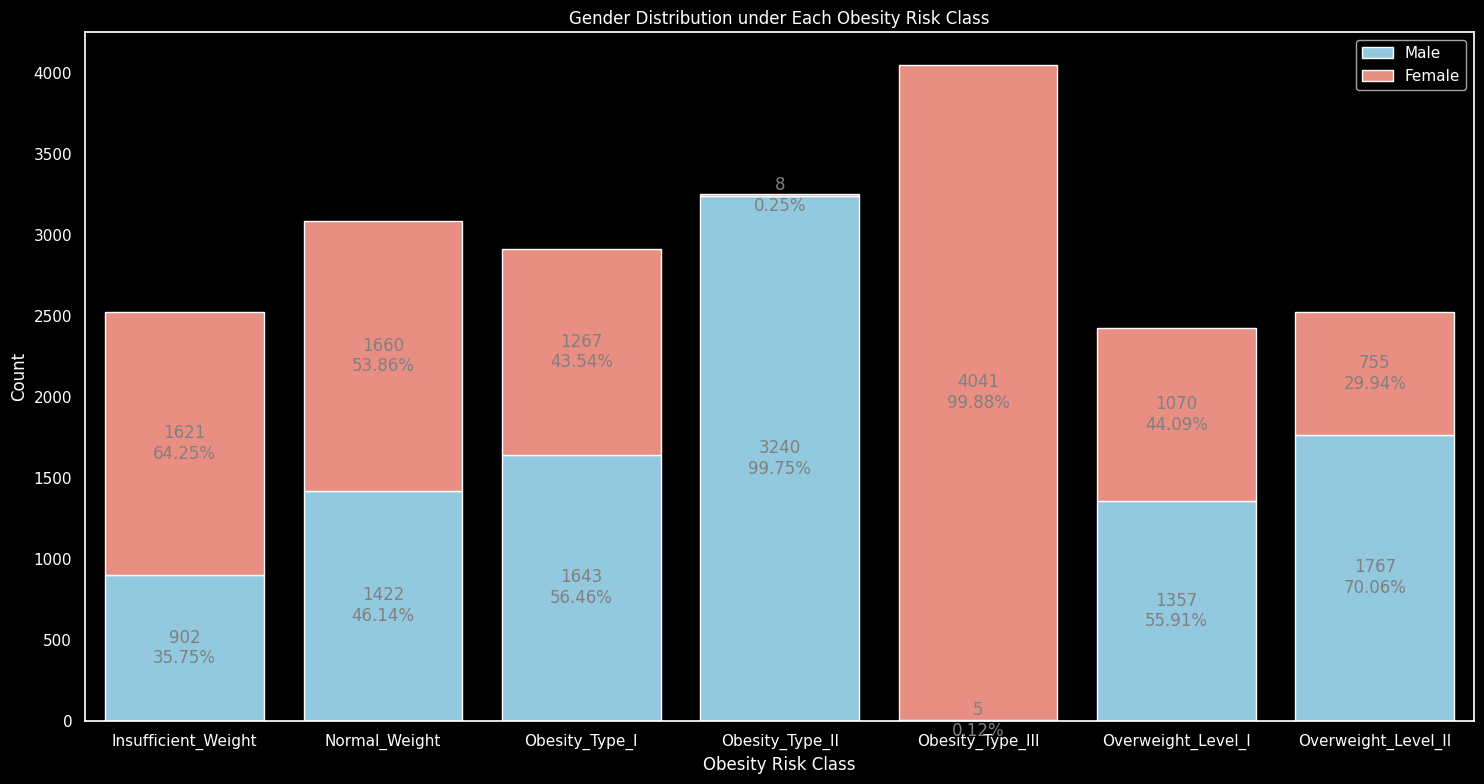

In [16]:
gender_counts = df_train.groupby(['Obesity_Risk', 'Gender']).size().unstack()

gender_percentages = gender_counts.div(gender_counts.sum(axis=1), axis=0) * 100
sns.set(style='dark', rc={"axes.facecolor": "black", "text.color": "white"})

plt.figure(figsize=(15, 8),facecolor = "black")
sns.barplot(x=gender_percentages.index, y=gender_counts['Male'], color='skyblue', label='Male')
sns.barplot(x=gender_percentages.index, y=gender_counts['Female'], color='salmon', bottom=gender_counts['Male'], label='Female')

for i, class_name in enumerate(gender_percentages.index):
    male_percentage = gender_percentages['Male'][i]
    female_percentage = gender_percentages['Female'][i]
    male_count = gender_counts['Male'][i]
    female_count = gender_counts['Female'][i]

    plt.text(i, male_count / 2, f"{male_count}\n{male_percentage:.2f}%", ha='center', va='center', color='gray')
    plt.text(i, male_count + female_count / 2, f"{female_count}\n{female_percentage:.2f}%", ha='center', va='center', color='gray')

plt.title('Gender Distribution under Each Obesity Risk Class', color='white')
plt.xlabel('Obesity Risk Class', color='white')
plt.ylabel('Count', color='white')
plt.legend()
plt.setp(plt.gca().get_xticklabels(), color='white')
plt.setp(plt.gca().get_yticklabels(), color='white')
plt.setp(plt.gca().get_xaxis().get_label(), color='white')
plt.setp(plt.gca().get_yaxis().get_label(), color='white')
plt.tight_layout()
plt.show()

### Scatter plot

### Pair plot

In [17]:
def scatterplot(x, y, df):
    clarity_ranking = ["Insufficient_Weight", "Normal_Weight", "Overweight_Level_I", "Overweight_Level_II", "Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III"]

    sns.lmplot(x=x, y=y, data=df, fit_reg=False, hue='Obesity_Risk',
                hue_order=clarity_ranking, legend=True, height=10,aspect =1.2,palette="Spectral", scatter_kws={"s": 15,"alpha":0.5,
#                                                                                                                "edgecolor":"white", 
#                                                                                                                "linewidth":.05
                                                                                                              })
        
    plt.title(f"Relationship between {x} and {y}")
    plt.xlabel(x)
    plt.ylabel(y)
    plt.grid(True)  # Adding gridlines
    plt.style.use("dark_background")
    plt.show()
#     palette="ch:r=-.2,d=.3_r"
#  Pastel2
# RdBu


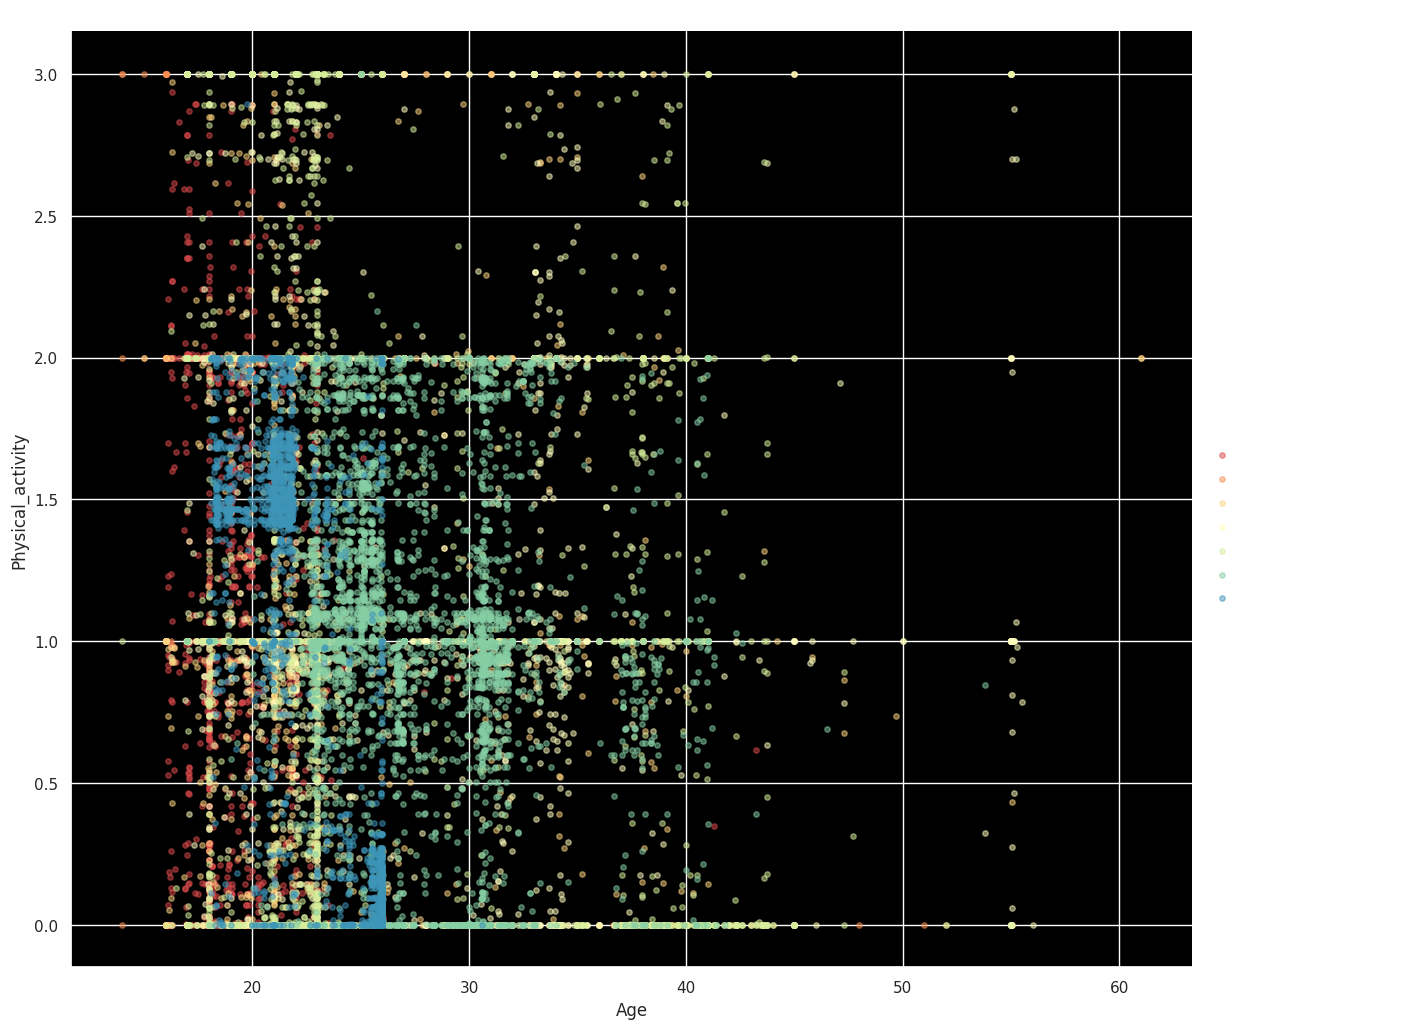

In [18]:
scatterplot("Age", 'Physical_activity', df_train)

- the denisty of datapoints from the graph suggest that, there is a negative correlation between age and physical activit; as age increases, physical activity levels tend to decrease.
- overweight level I , II and insufficient weight has a wider spread of datapoints, some young individuals have high physical activity and older people with low physical activity. most of the underweight people tend to be around young or young adult stage
- individuals with normal weight mostly fall under the teenage and young adults with moderate level of physical activities mostly and few arounf mixed activity range
- obesity II and III shows a tighter concentration of data points. Yound adults with obesity type II tends to have moderate level of physical activity, but adults with II barely engages themselves with physical activities.On the other hand, individuals with obesity type III mostly affects the adult people. Some of them associated with no physical activty at all, while others tend to some moderate level of physical activities.


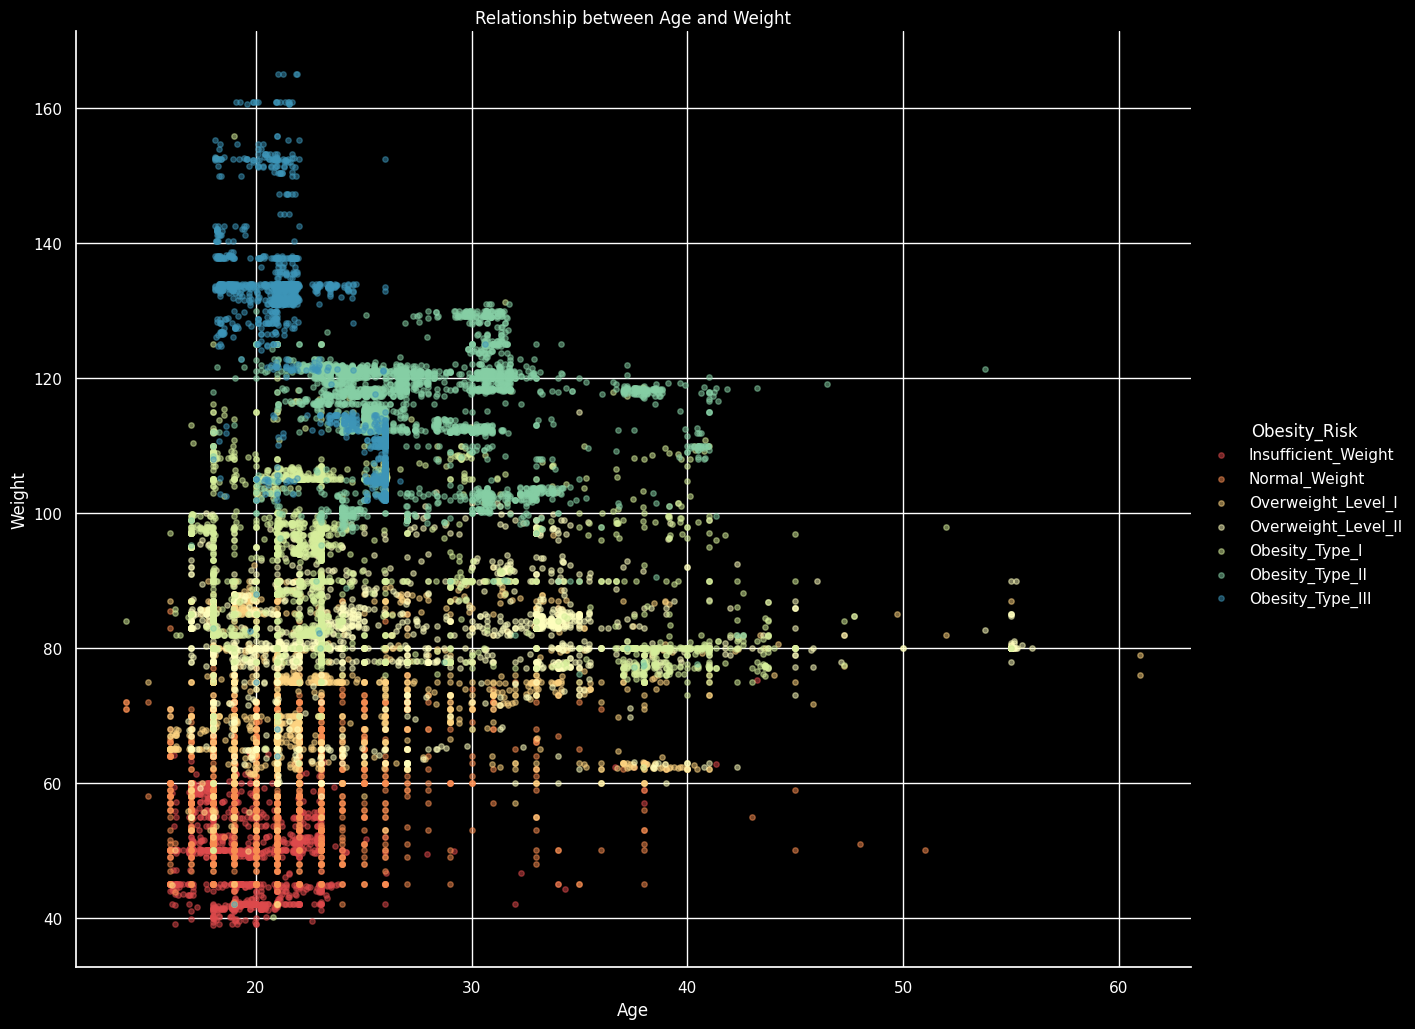

In [19]:
scatterplot("Age", 'Weight', df_train)

- There seems to be positive correlation between age and weight. This aligns with weight gain and metabolism. As people age, their metabolism often slows down, making it easier to gain weight and lose muscle mass.
- Young and young adults tend to fall under insuffiecient weight class
- Classes with lower obesity risk (Normal Weight, Overweight Level I, Overweight Level II) showcasing data points in more scattered manner throughout the graph, with some individuals maintaining a healthy weight or even losing weight with age
- Classes with higher obesity risk (Obesity Type I, II, III) tend to have a larger concentration of data points  indicates both higher weight and older age.

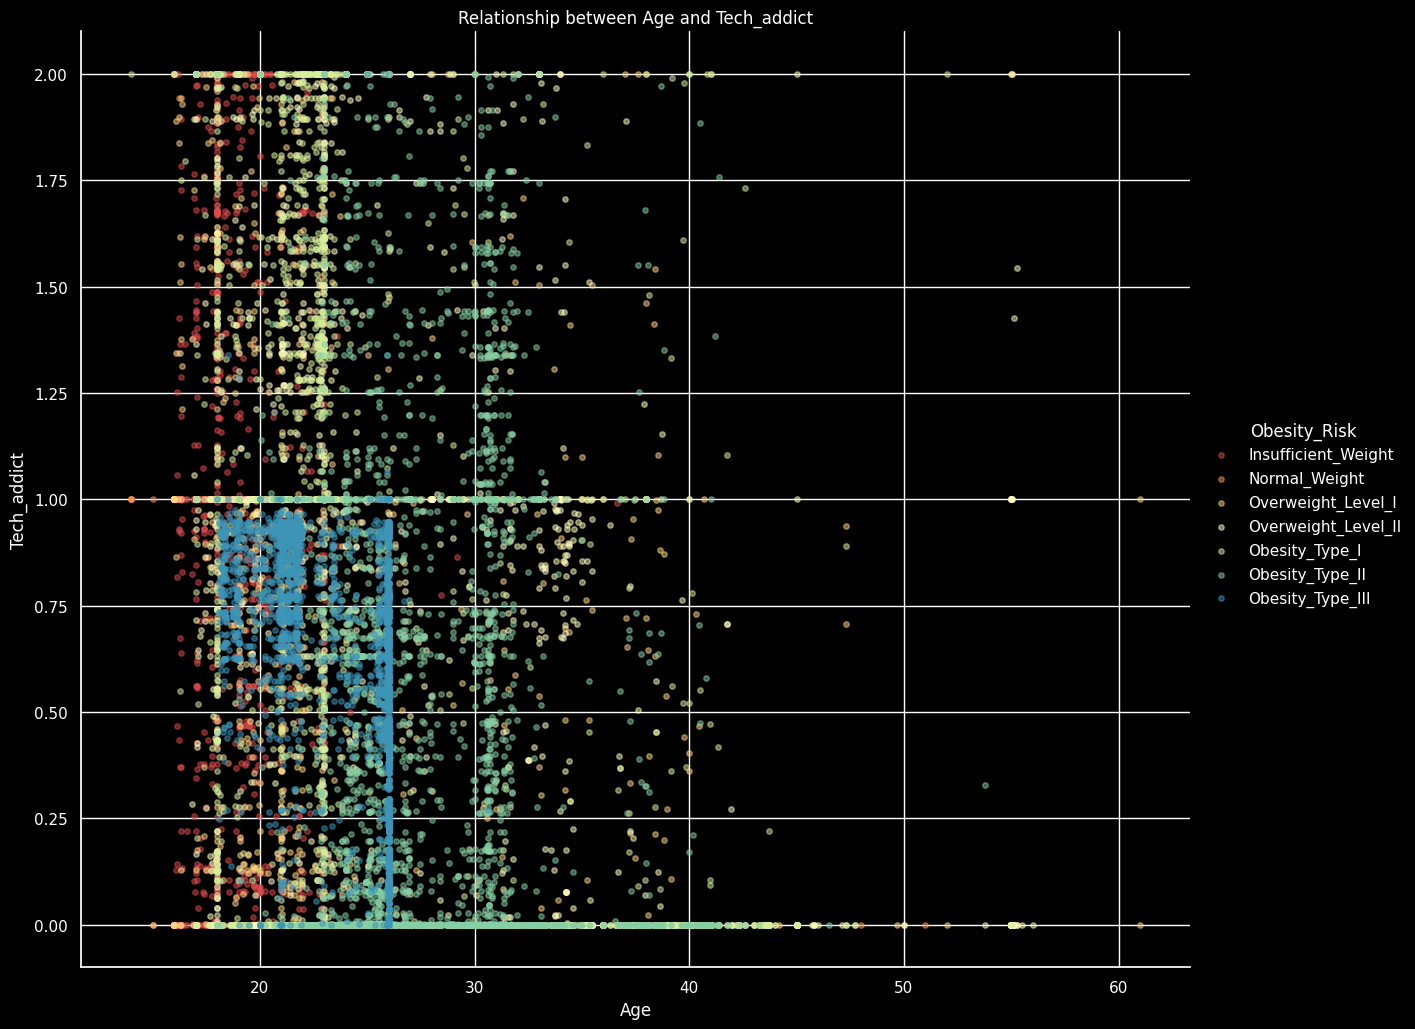

In [20]:
scatterplot("Age", 'Tech_addict', df_train)

- The correlation between age and tech addict is positively moderate. Very few adults over 40 age shows any association with device usages.
- There seems to be a wider range on level of technology dependencies between 20 to 40 age range

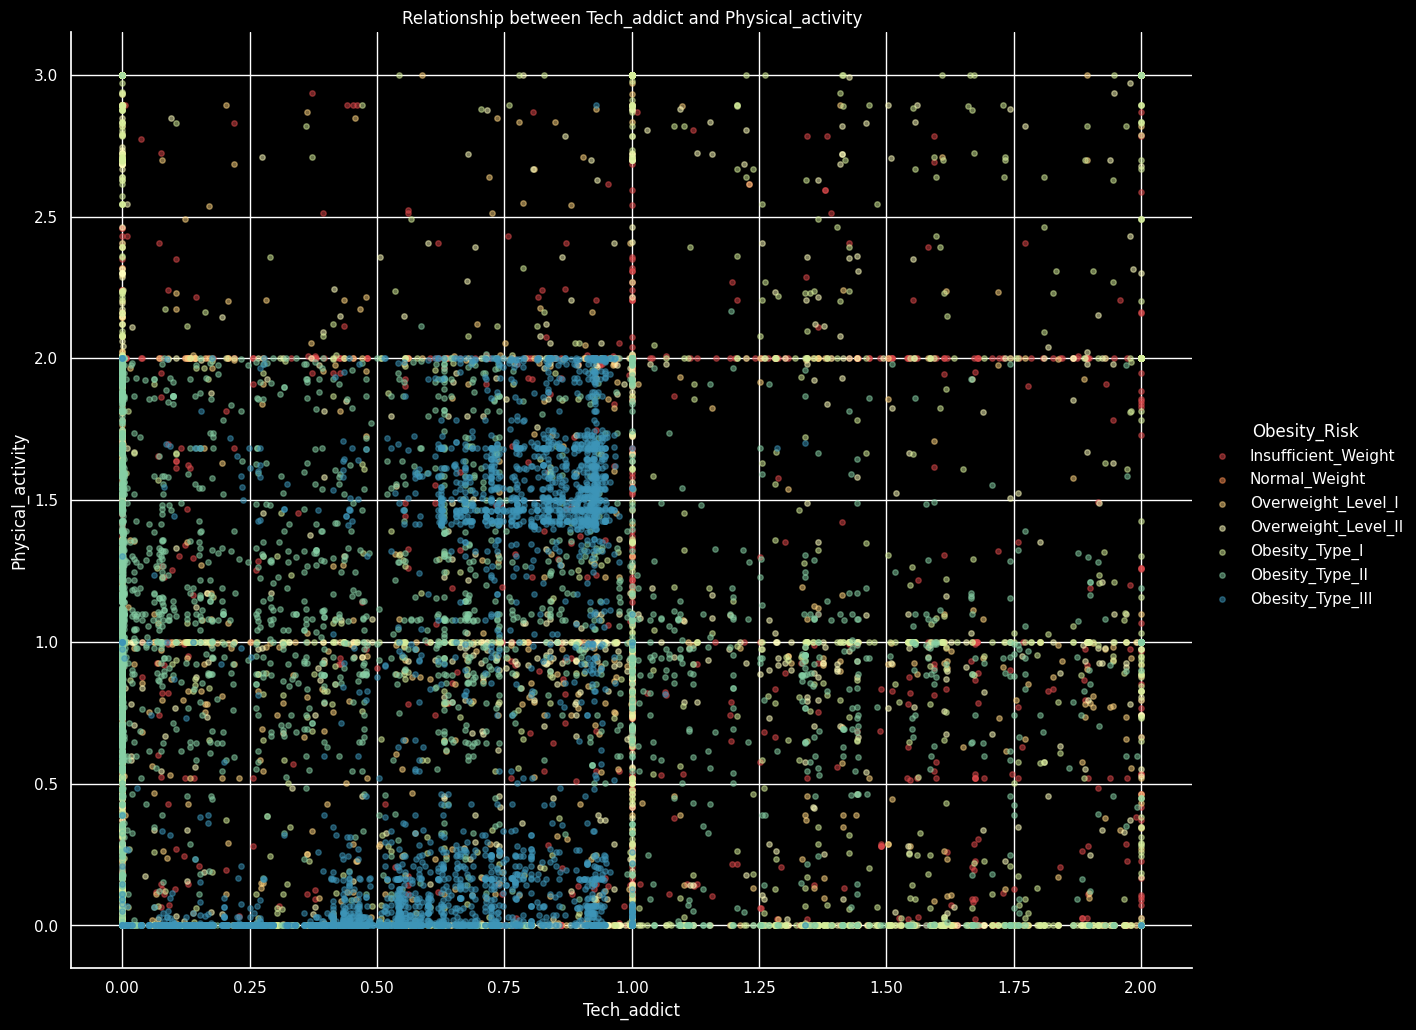

In [21]:
scatterplot( 'Tech_addict', "Physical_activity",df_train)

- There appears to be a weak or negligible correlation between physical activity and tech addiction across most obesity classes. 
- People with high tech addiction can have high, low, or moderate levels of physical activity, and vice versa.
- On the contratry, there seems to be an exception for individuals with obesity type III.Some within this group show limited involvement in physical activity and exhibit minimal dependence on technology. Conversely, the remaining individuals in this category demonstrate moderate levels of physical activity with reduced reliance on technology as well.

### Raincloud plot

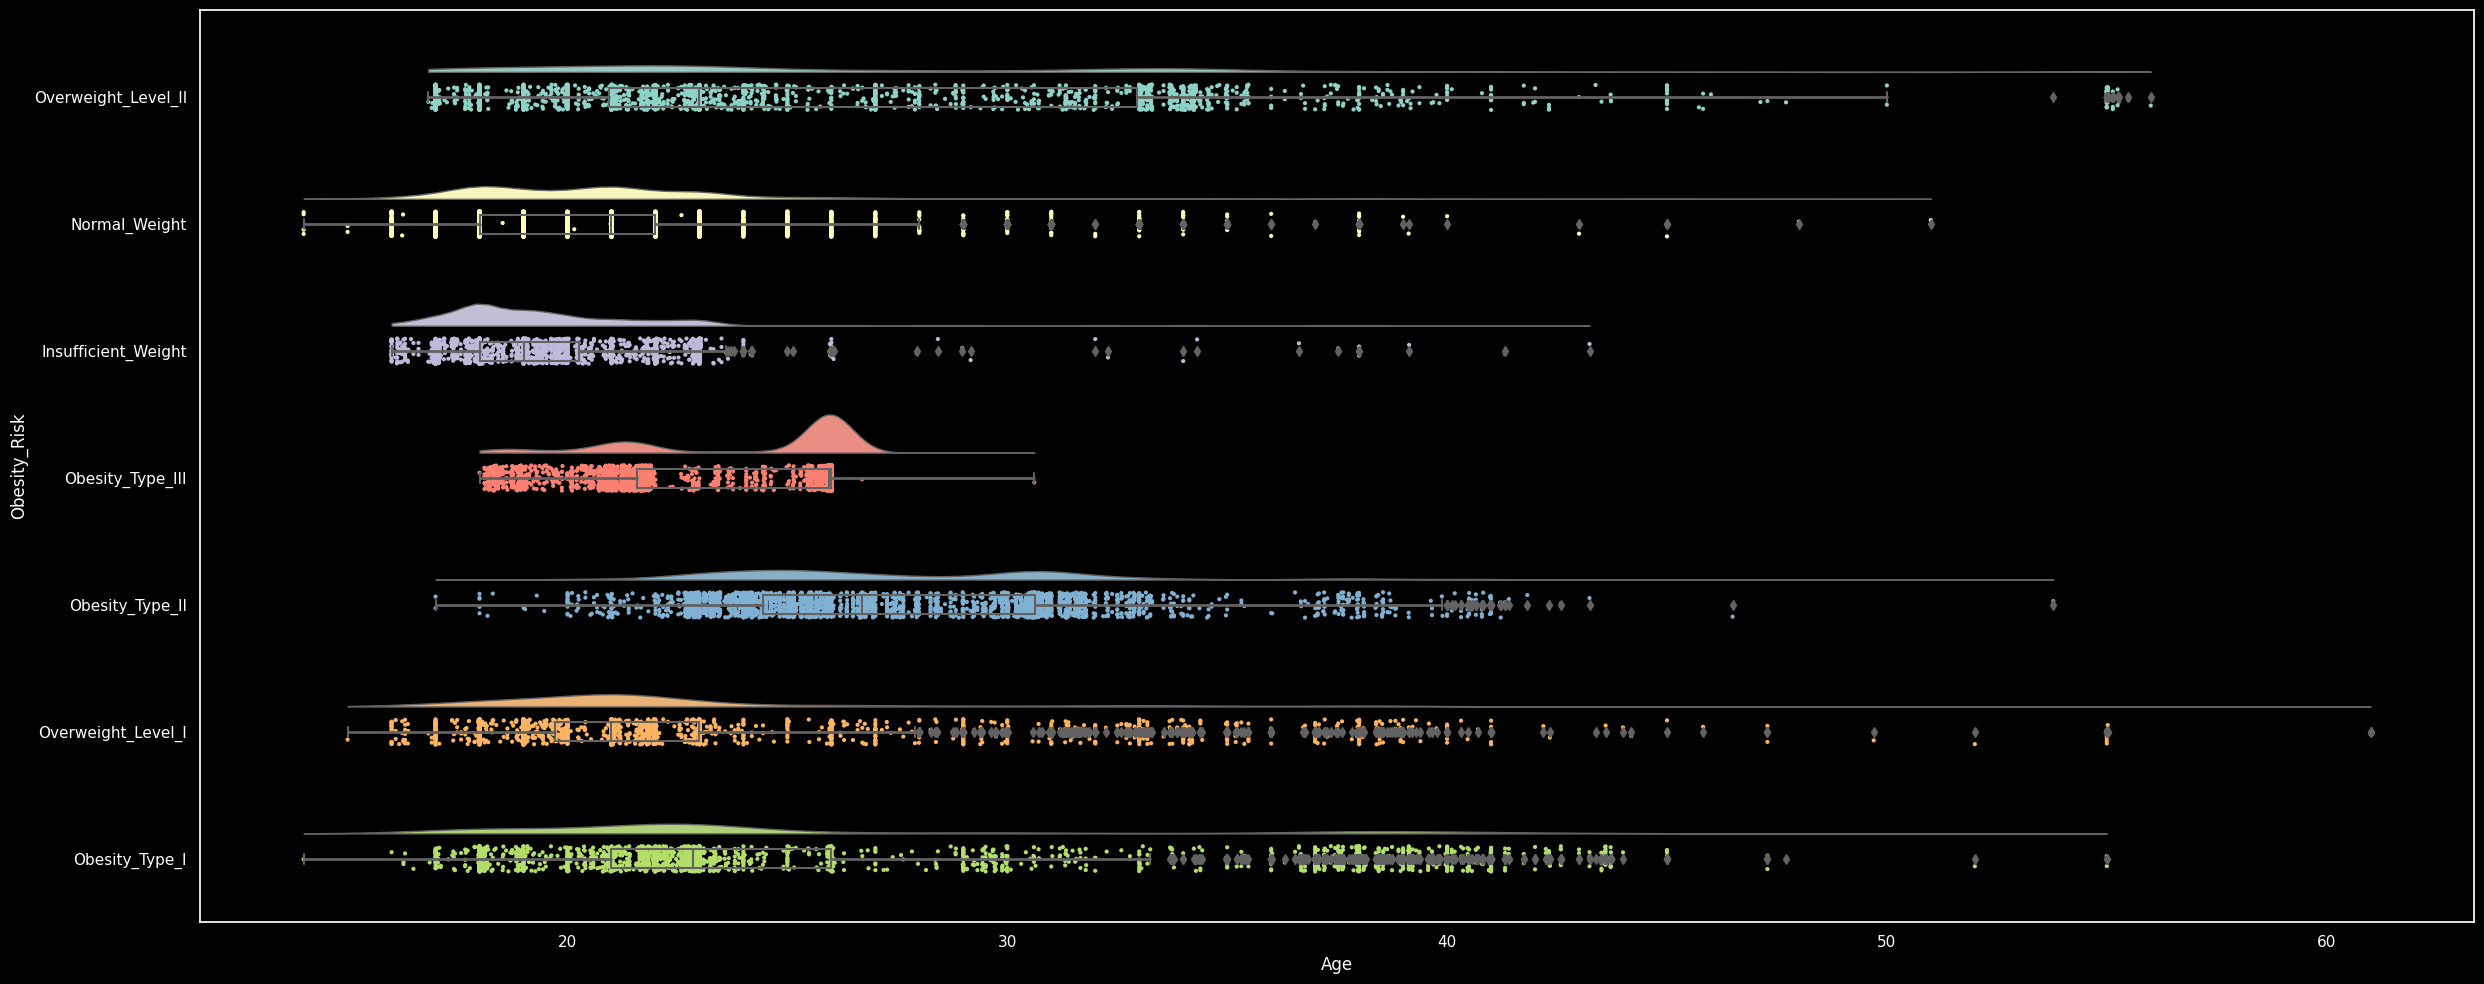

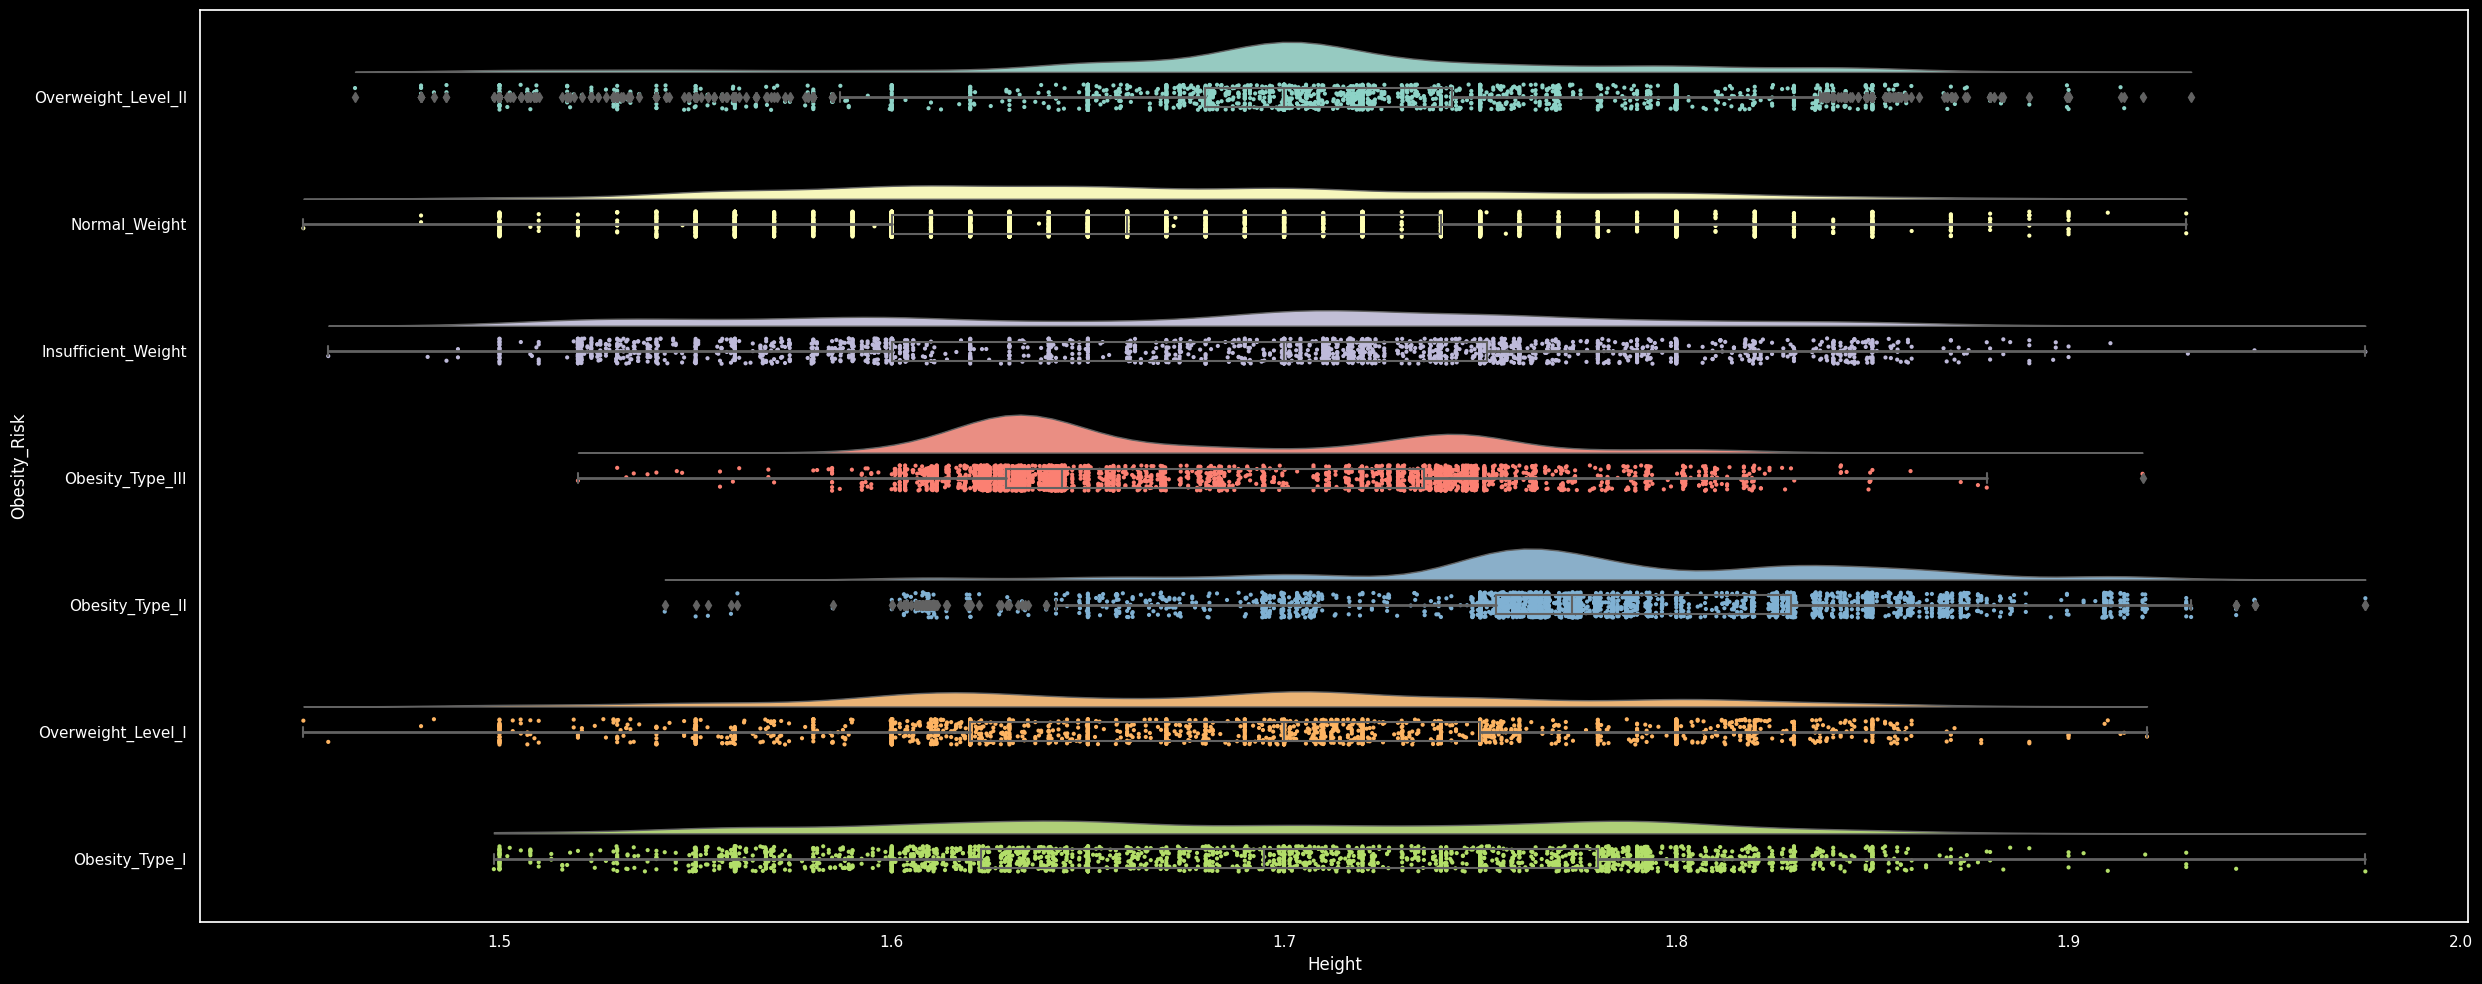

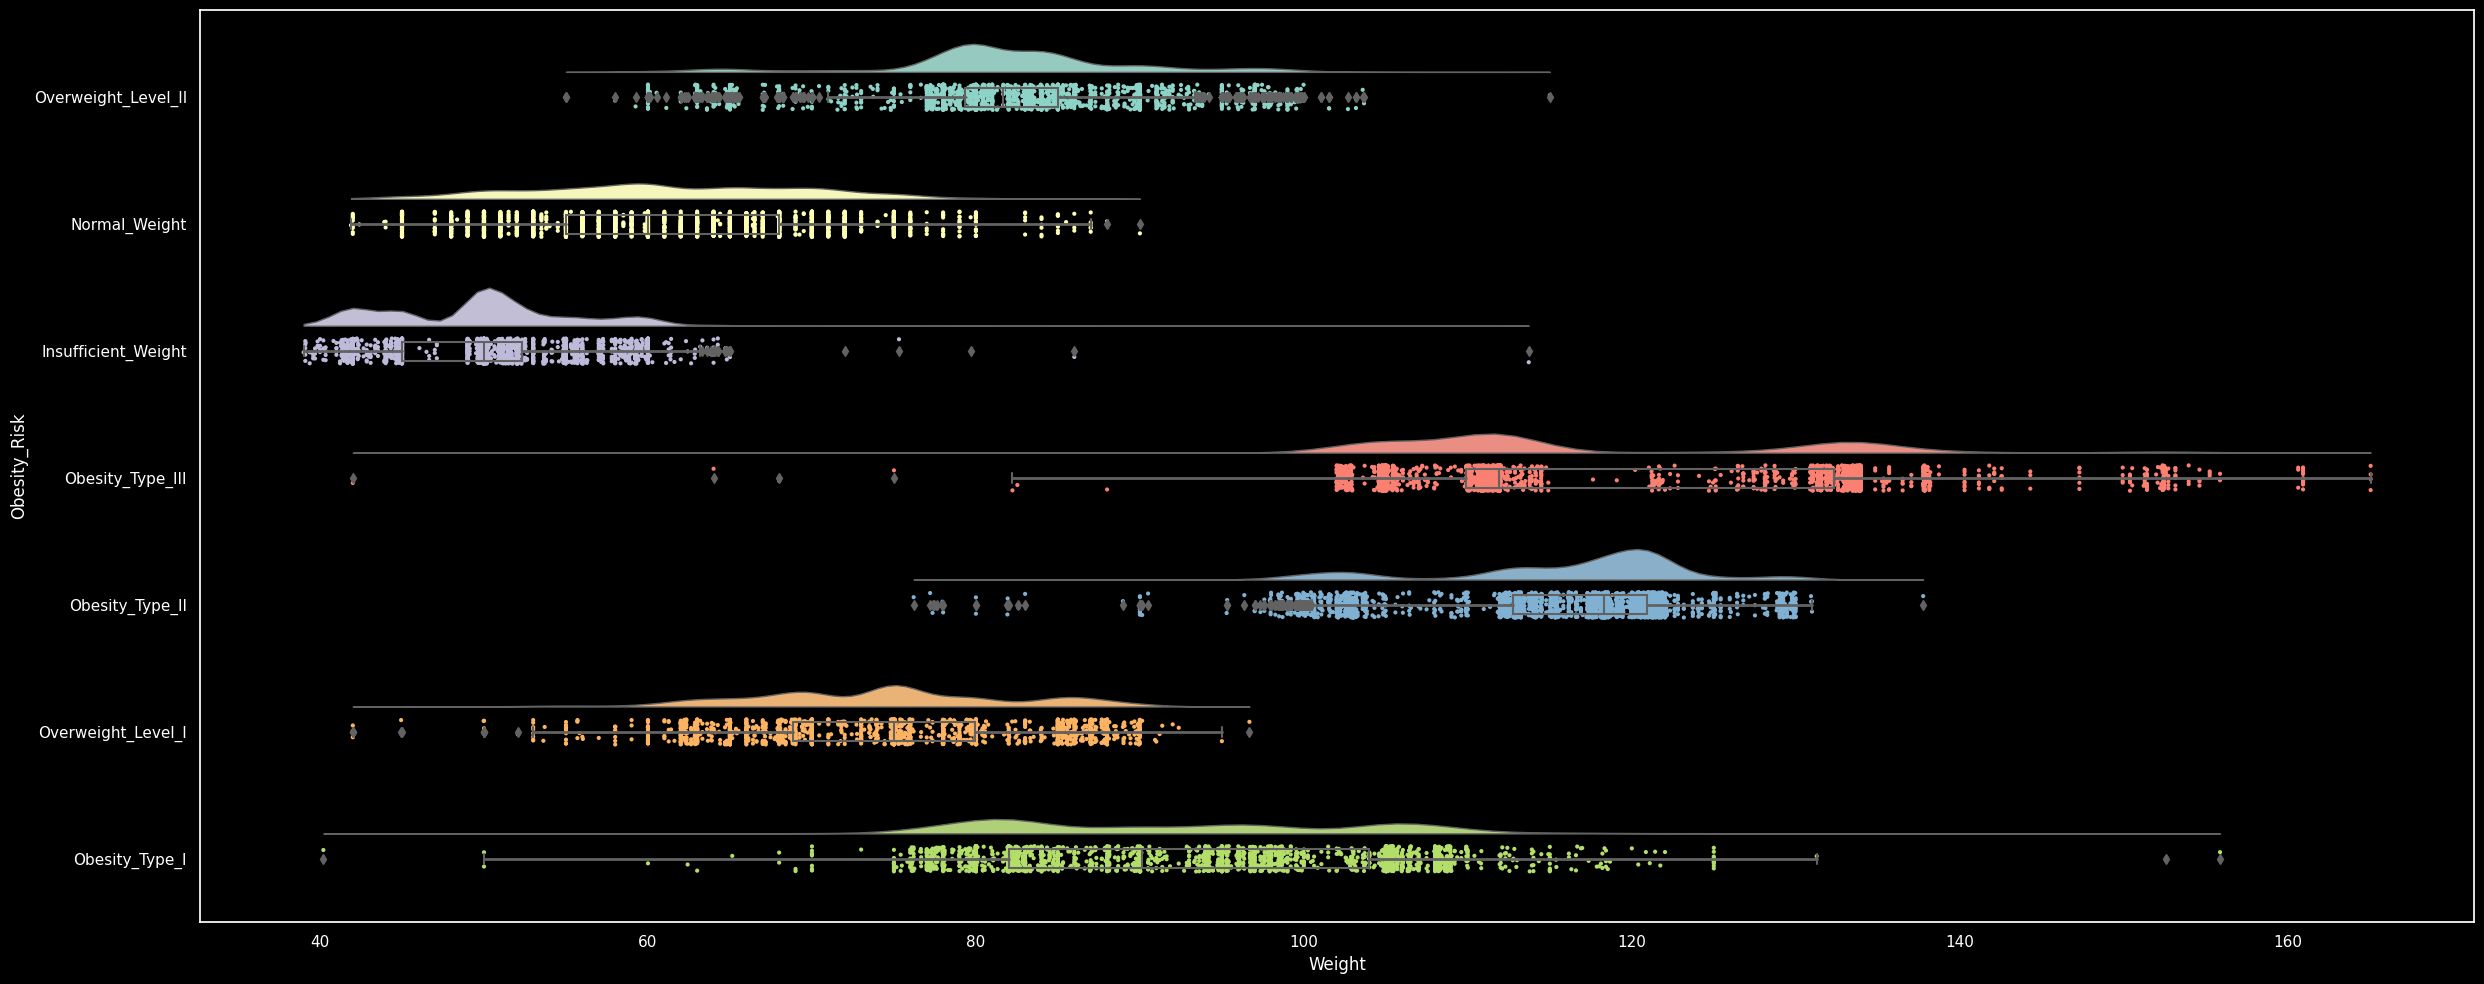

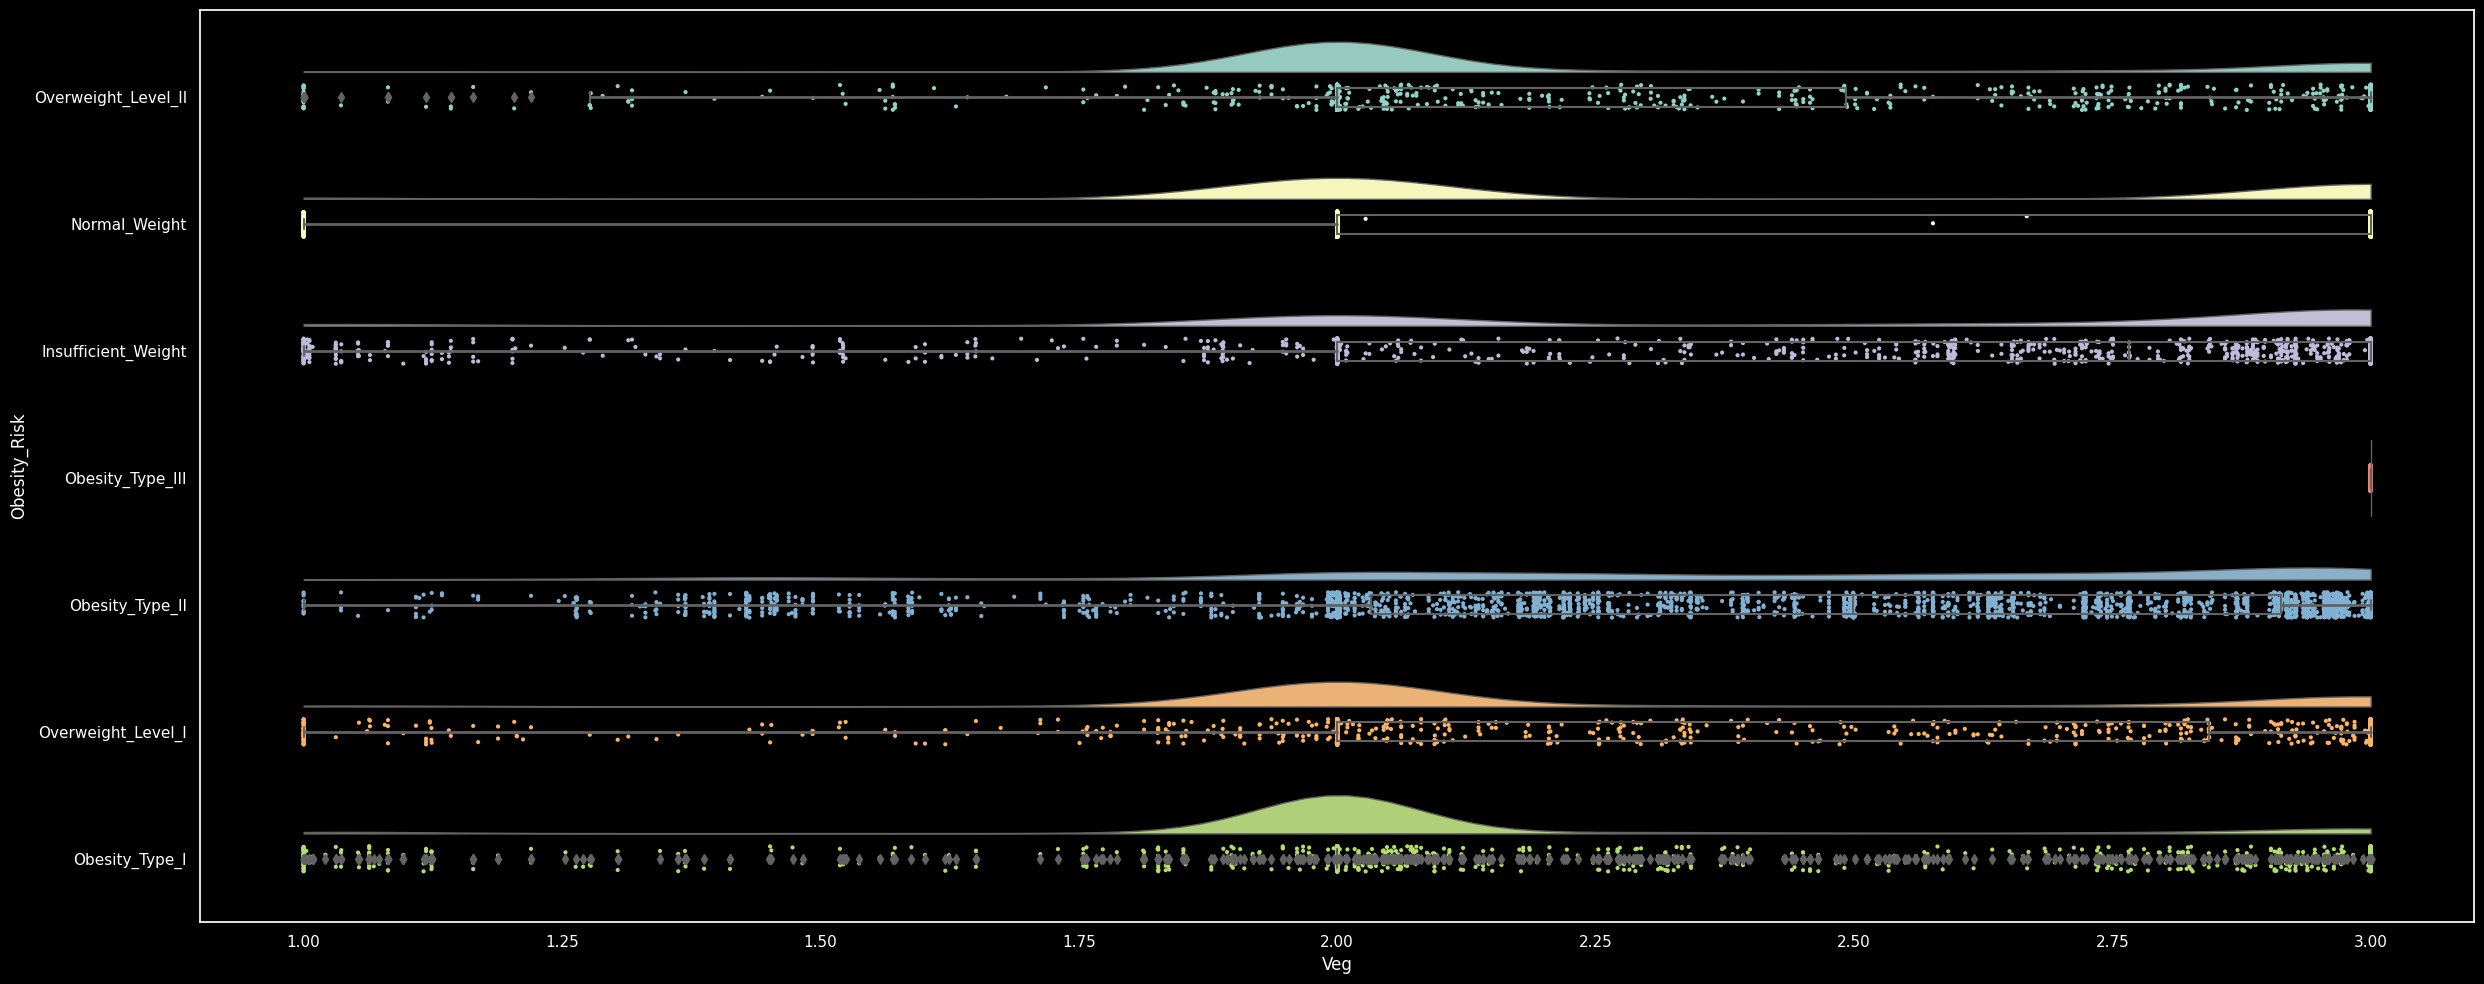

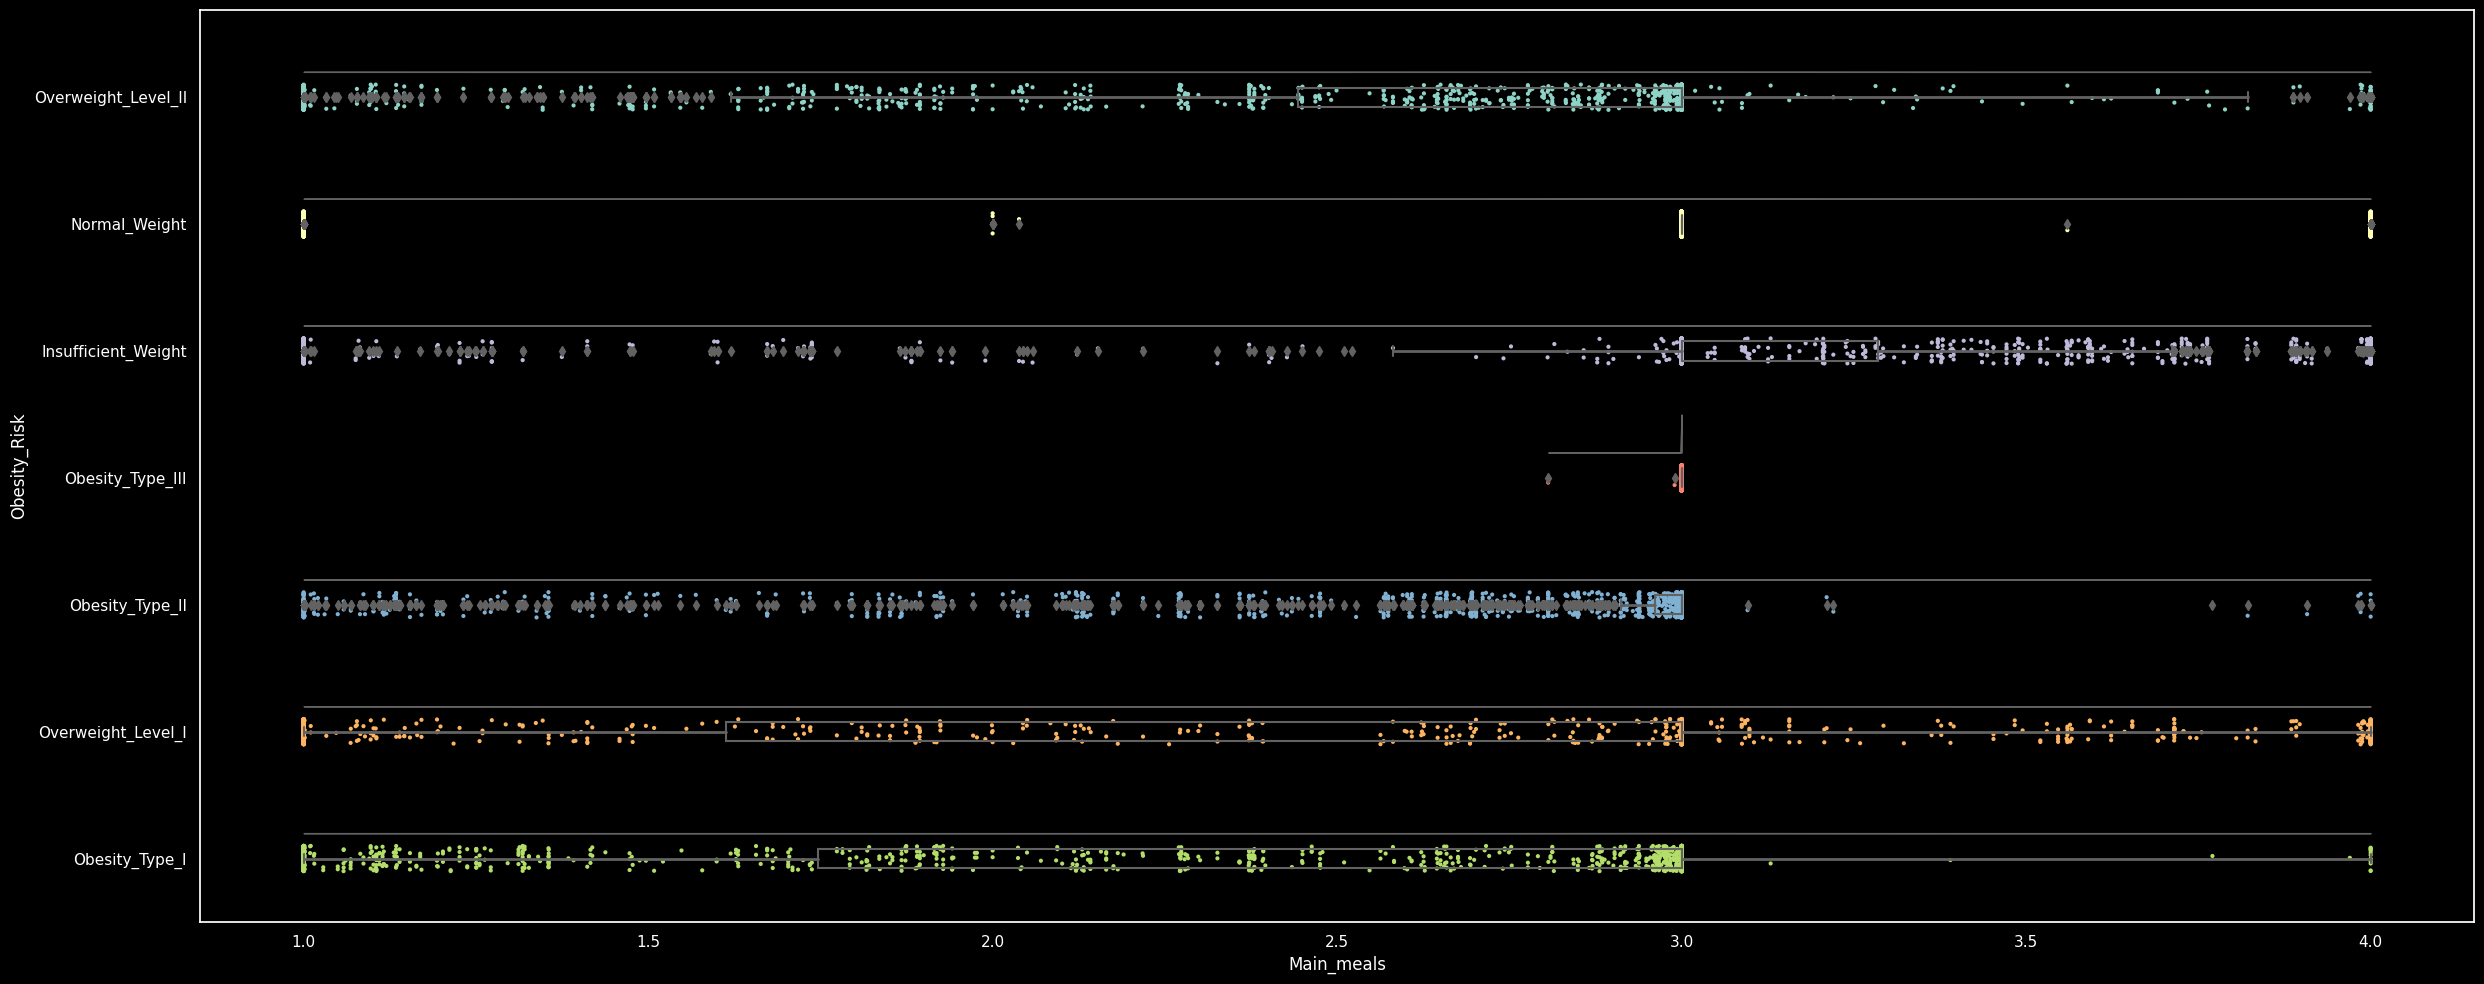

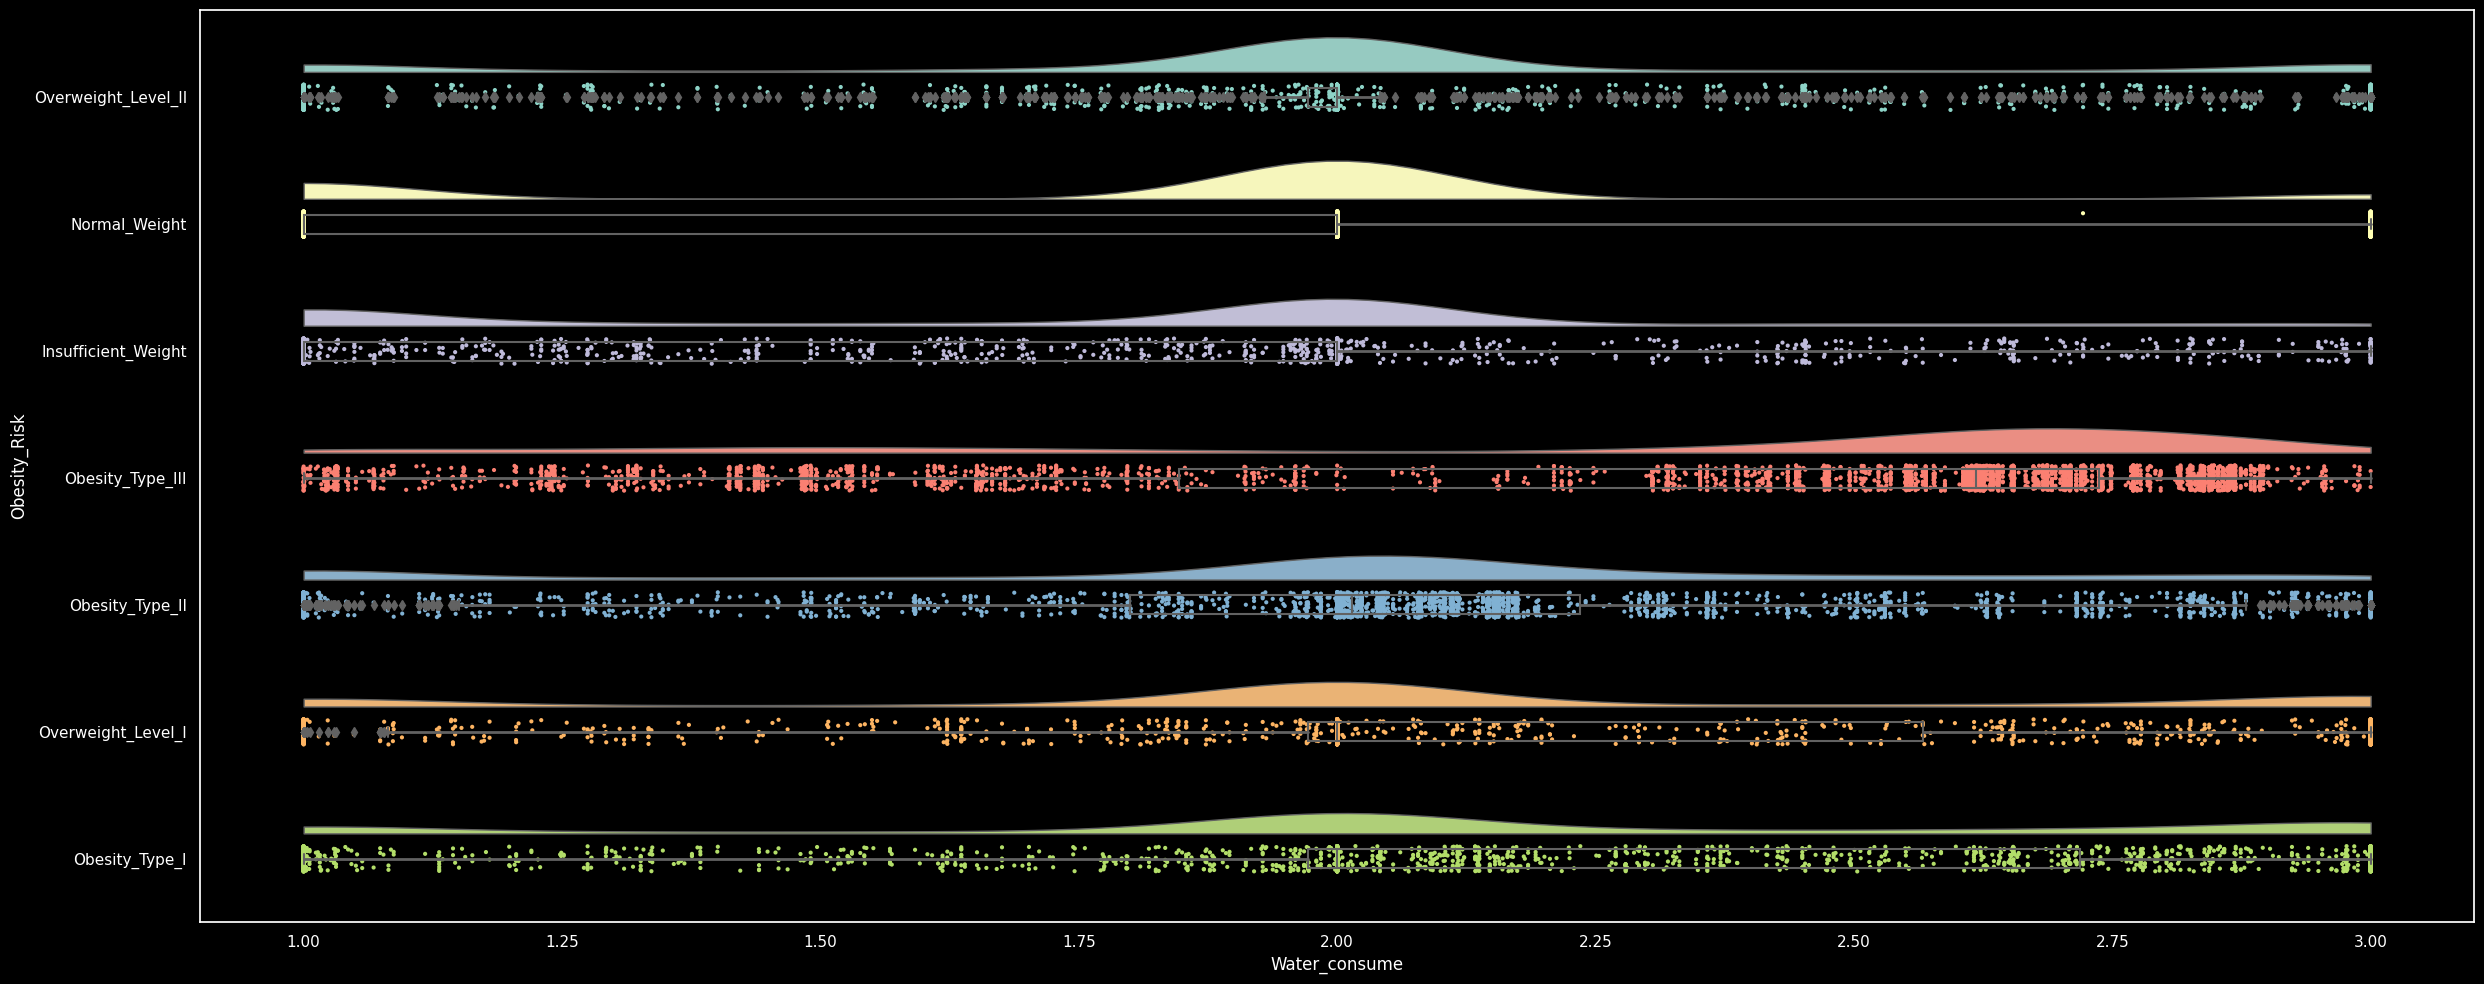

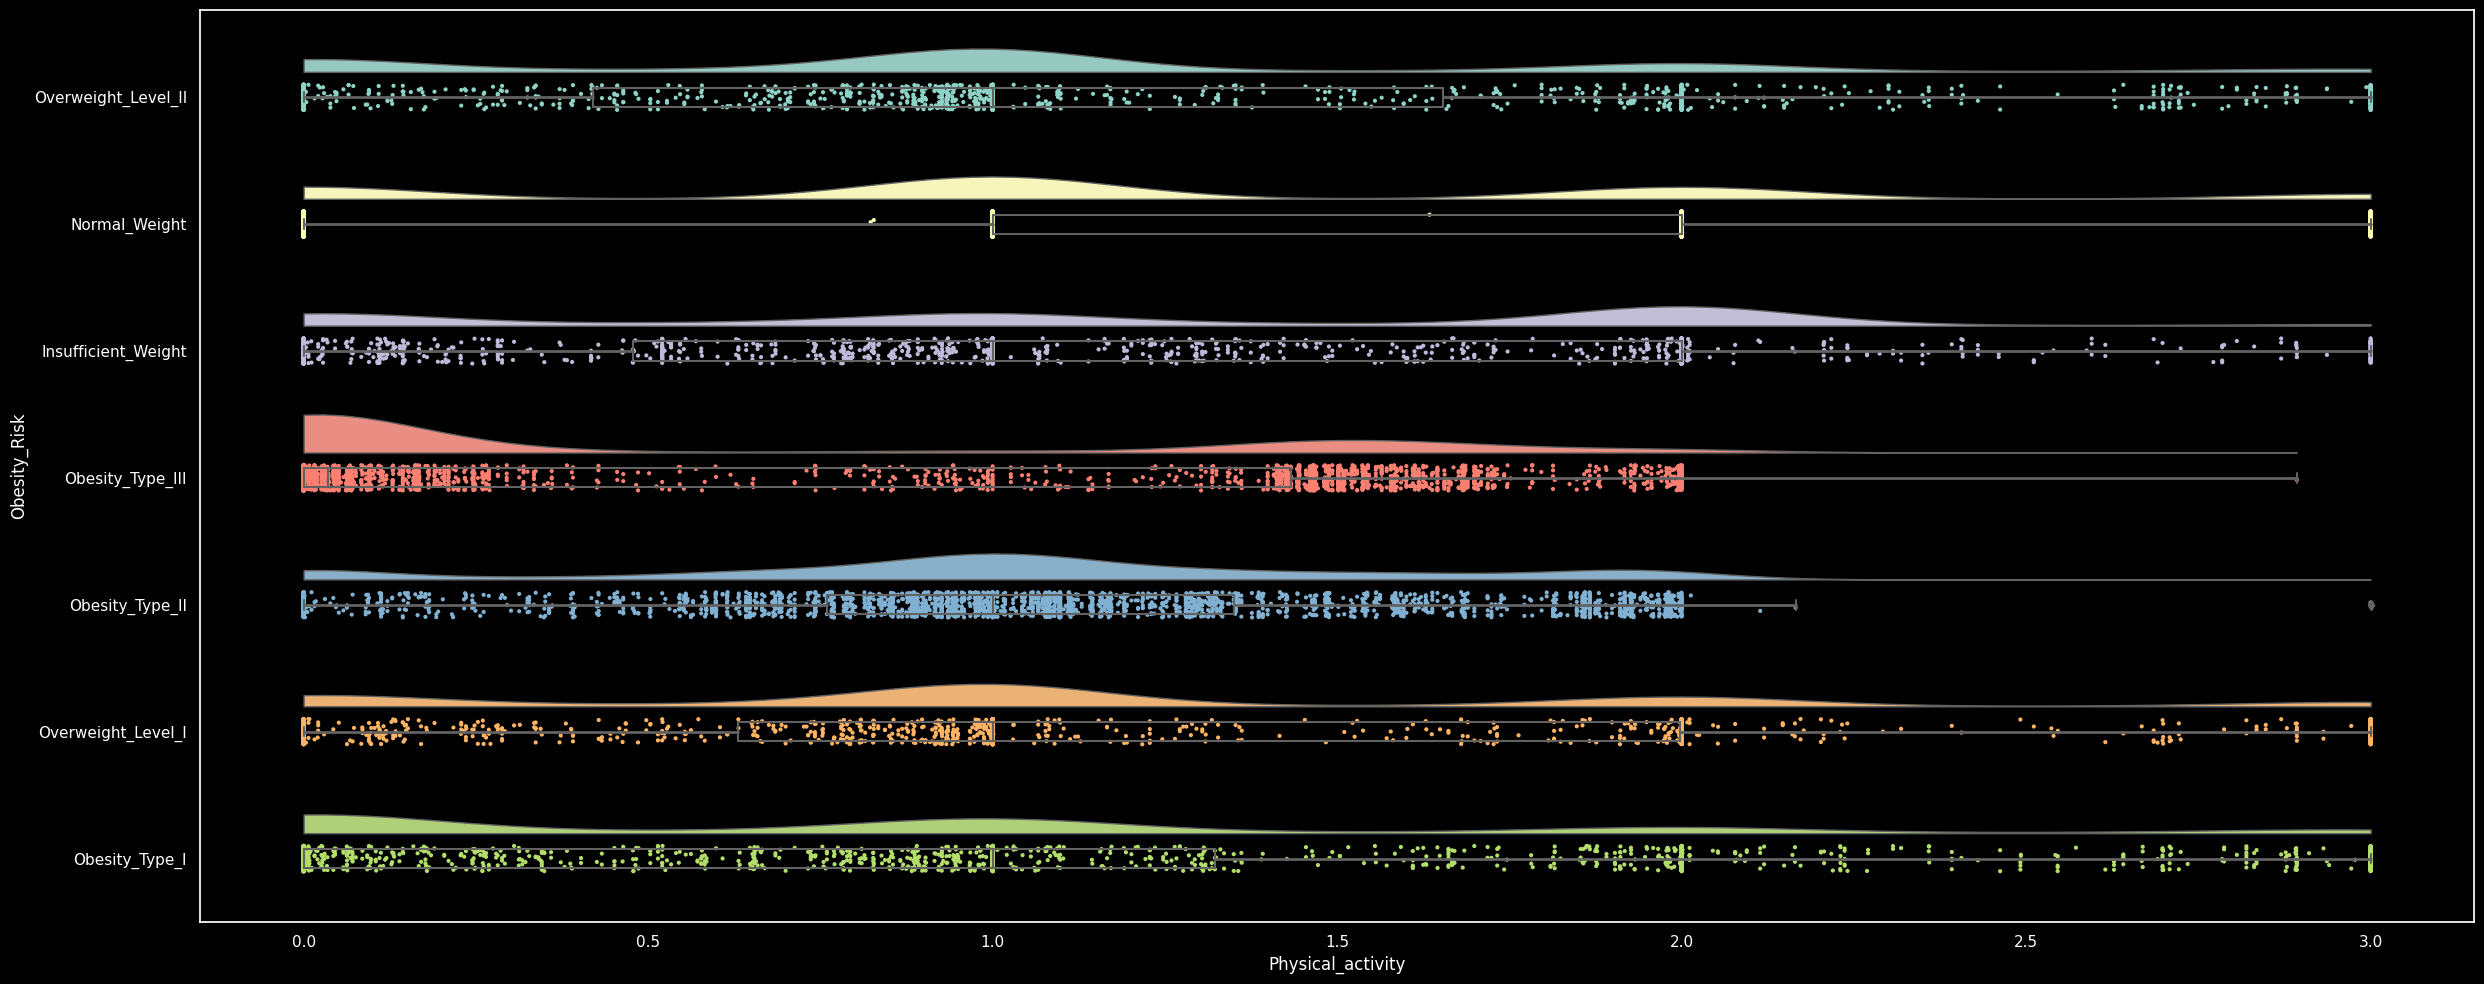

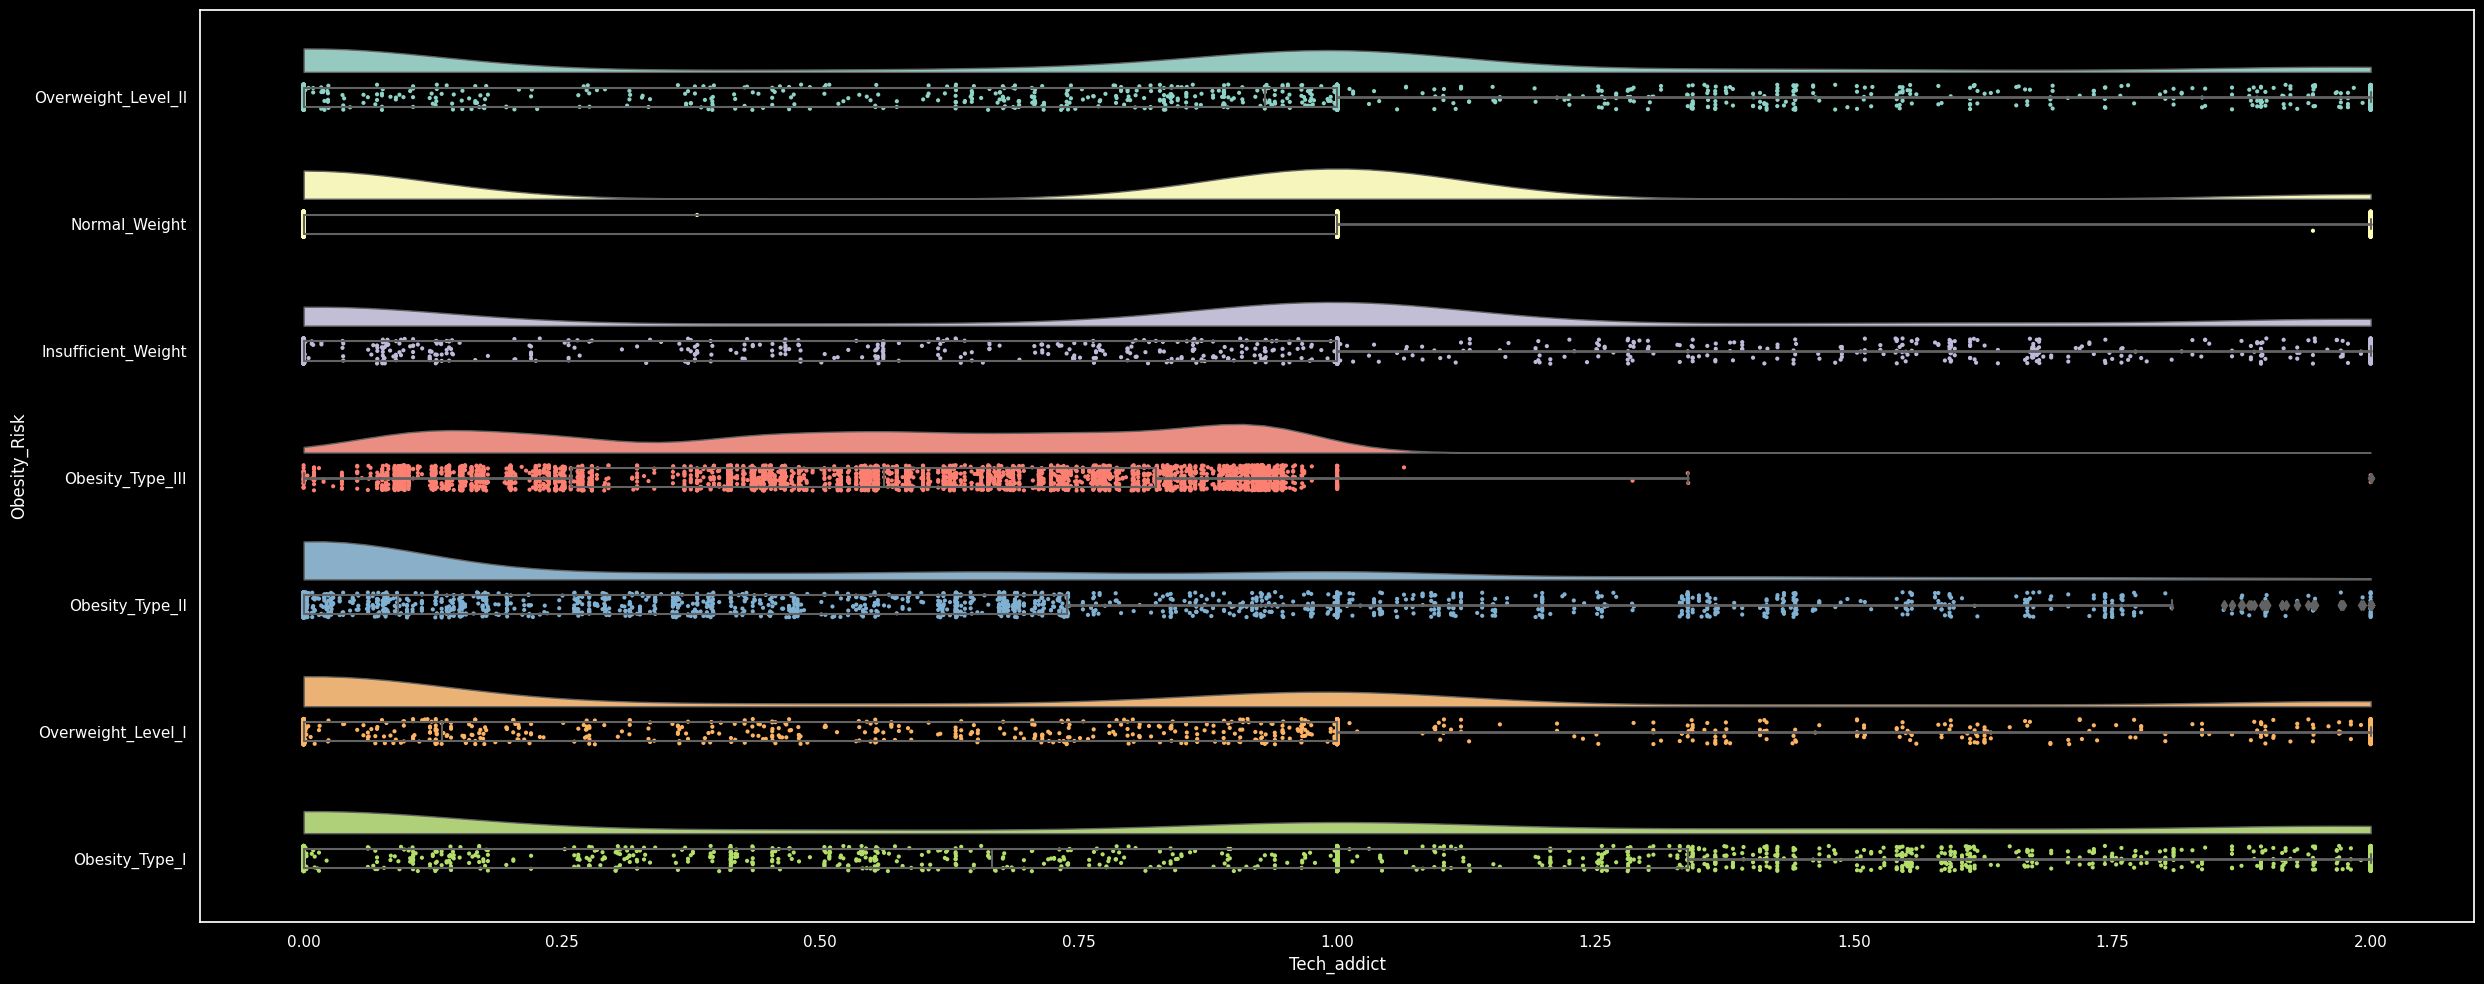

In [22]:
def raincloud(df, dx, dy):
    f, ax = plt.subplots(figsize=(25, 10))
    dy = dy
    dx = dx
    ort = "h"  # Change orientation to vertical
    pal = "Set3"
    sigma = .2

    pt.RainCloud(x=dy, y=dx, data=df, palette=pal, bw=sigma,
                 width_viol=.6, ax=ax, orient=ort)  
#     ax.set_facecolor('#333333')
#     f.set_facecolor('#333333')
#     plt.title("Rainclouds")
    plt.tight_layout()
    plt.show()

for columns in num_cols:
    raincloud(df_train, columns, dy='Obesity_Risk')  

### Heatmap

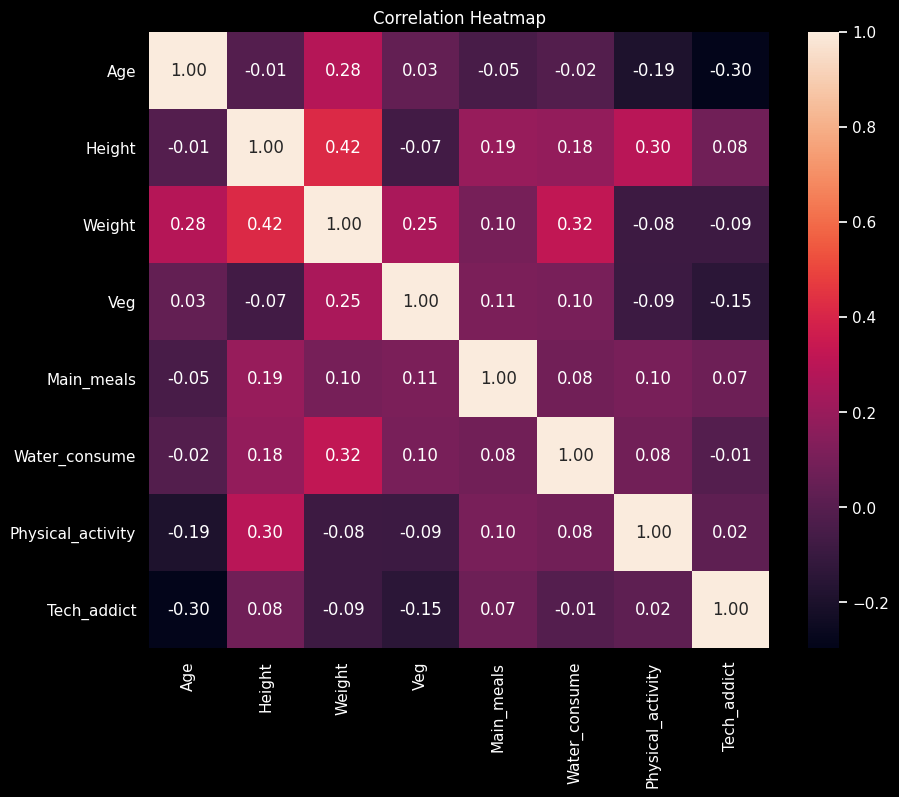

In [23]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
corr = df_train[num_cols].corr()
sns.heatmap(corr, annot=True, fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

### Data Distribution of target column

## 3.2. Preprocessing and feature engineering

In [24]:
train_copy =df_train.copy()
train_copy

Gender        Age    Height      Weight Fam_history Caloric_food  \
0        Male  24.443011  1.699998   81.669950         yes          yes   
1      Female  18.000000  1.560000   57.000000         yes          yes   
2      Female  18.000000  1.711460   50.165754         yes          yes   
3      Female  20.952737  1.710730  131.274851         yes          yes   
4        Male  31.641081  1.914186   93.798055         yes          yes   
...       ...        ...       ...         ...         ...          ...   
20753    Male  25.137087  1.766626  114.187096         yes          yes   
20754    Male  18.000000  1.710000   50.000000          no          yes   
20755    Male  20.101026  1.819557  105.580491         yes          yes   
20756    Male  33.852953  1.700000   83.520113         yes          yes   
20757    Male  26.680376  1.816547  118.134898         yes          yes   

            Veg  Main_meals Foods_betwn_meals Smoker  Water_consume  \
0      2.000000    2.983297         Sometimes     no       2.763573   
1      2.000000    3.000000        Frequently     no       2.000000   
2      1.880534    1.411685         Sometimes     no       1.910378   
3      3.000000    3.000000         Sometimes     no       1.674061   
4      2.679664    1.971472         Sometimes     no       1.979848   
...         ...         ...               ...    ...            ...   
20753  2.919584    3.000000         Sometimes     no       2.151809   
20754  3.000000    4.000000        Frequently     no       1.000000   
20755  2.407817    3.000000         Sometimes     no       2.000000   
20756  2.671238    1.971472         Sometimes     no       2.144838   
20757  3.000000    3.000000         Sometimes     no       2.003563   

      Calories_monitored  Physical_activity  Tech_addict Alcohol_consume  \
0                     no           0.000000     0.976473       Sometimes   
1                     no           1.000000     1.000000              no   
2                     no           0.866045     1.673584              no   
3                     no           1.467863     0.780199       Sometimes   
4                     no           1.967973     0.931721       Sometimes   
...                  ...                ...          ...             ...   
20753                 no           1.330519     0.196680       Sometimes   
20754                 no           2.000000     1.000000       Sometimes   
20755                 no           1.158040     1.198439              no   
20756                 no           0.000000     0.973834              no   
20757                 no           0.684487     0.713823       Sometimes   

                   Transport         Obesity_Risk  
0      Public_Transportation  Overweight_Level_II  
1                 Automobile        Normal_Weight  
2      Public_Transportation  Insufficient_Weight  
3      Public_Transportation     Obesity_Type_III  
4      Public_Transportation  Overweight_Level_II  
...                      ...                  ...  
20753  Public_Transportation      Obesity_Type_II  
20754  Public_Transportation  Insufficient_Weight  
20755  Public_Transportation      Obesity_Type_II  
20756             Automobile  Overweight_Level_II  
20757  Public_Transportation      Obesity_Type_II  

[20758 rows x 17 columns]

In [25]:
train_copy["BMI"] = train_copy['Weight']/(train_copy["Height"]**2)
train_copy.drop(["Height","Weight"],axis =1,inplace = True)
train_copy

Gender        Age Fam_history Caloric_food       Veg  Main_meals  \
0        Male  24.443011         yes          yes  2.000000    2.983297   
1      Female  18.000000         yes          yes  2.000000    3.000000   
2      Female  18.000000         yes          yes  1.880534    1.411685   
3      Female  20.952737         yes          yes  3.000000    3.000000   
4        Male  31.641081         yes          yes  2.679664    1.971472   
...       ...        ...         ...          ...       ...         ...   
20753    Male  25.137087         yes          yes  2.919584    3.000000   
20754    Male  18.000000          no          yes  3.000000    4.000000   
20755    Male  20.101026         yes          yes  2.407817    3.000000   
20756    Male  33.852953         yes          yes  2.671238    1.971472   
20757    Male  26.680376         yes          yes  3.000000    3.000000   

      Foods_betwn_meals Smoker  Water_consume Calories_monitored  \
0             Sometimes     no       2.763573                 no   
1            Frequently     no       2.000000                 no   
2             Sometimes     no       1.910378                 no   
3             Sometimes     no       1.674061                 no   
4             Sometimes     no       1.979848                 no   
...                 ...    ...            ...                ...   
20753         Sometimes     no       2.151809                 no   
20754        Frequently     no       1.000000                 no   
20755         Sometimes     no       2.000000                 no   
20756         Sometimes     no       2.144838                 no   
20757         Sometimes     no       2.003563                 no   

       Physical_activity  Tech_addict Alcohol_consume              Transport  \
0               0.000000     0.976473       Sometimes  Public_Transportation   
1               1.000000     1.000000              no             Automobile   
2               0.866045     1.673584              no  Public_Transportation   
3               1.467863     0.780199       Sometimes  Public_Transportation   
4               1.967973     0.931721       Sometimes  Public_Transportation   
...                  ...          ...             ...                    ...   
20753           1.330519     0.196680       Sometimes  Public_Transportation   
20754           2.000000     1.000000       Sometimes  Public_Transportation   
20755           1.158040     1.198439              no  Public_Transportation   
20756           0.000000     0.973834              no             Automobile   
20757           0.684487     0.713823       Sometimes  Public_Transportation   

              Obesity_Risk        BMI  
0      Overweight_Level_II  28.259565  
1            Normal_Weight  23.422091  
2      Insufficient_Weight  17.126706  
3         Obesity_Type_III  44.855798  
4      Overweight_Level_II  25.599151  
...                    ...        ...  
20753      Obesity_Type_II  36.587084  
20754  Insufficient_Weight  17.099278  
20755      Obesity_Type_II  31.889841  
20756  Overweight_Level_II  28.899693  
20757      Obesity_Type_II  35.800157  

[20758 rows x 16 columns]

In [26]:
cat_cols = [ cols for cols in train_copy.columns if train_copy[cols].dtype == 'object' ]
num_cols = [ cols for cols in train_copy.columns if train_copy[cols].dtype != 'object' ]

### Outliers

In [27]:
# Check for outliers in the data
def check_outliers(data, columns):
    for column in columns:
        # Calculate IQR (Interquartile Range)
        iqr = data[column].quantile(0.75) - data[column].quantile(0.25)
    
        # Define lower and upper thresholds
        lower_threshold = data[column].quantile(0.25) - 1.5 * iqr
        upper_threshold = data[column].quantile(0.75) + 1.5 * iqr
    
        # Find outliers
        outliers = data[(data[column] < lower_threshold) | (data[column] > upper_threshold)]
    
        # Print the count of outliers
        print(f"{column}\nNumber of outliers: {len(outliers)}\n")


check_outliers(train_copy, num_cols)

Age
Number of outliers: 1074

Veg
Number of outliers: 0

Main_meals
Number of outliers: 6052

Water_consume
Number of outliers: 0

Physical_activity
Number of outliers: 0

Tech_addict
Number of outliers: 0

BMI
Number of outliers: 0



In [28]:
train_copy["Age"].value_counts()

Age
18.000000    1916
26.000000    1806
21.000000    1643
23.000000    1202
19.000000     886
             ... 
23.462915       1
18.065817       1
21.945380       1
16.120699       1
33.852953       1
Name: count, Length: 1703, dtype: int64

# To do list
- modify the scatter plot (DONE!)
- categorize the age and main meals column?
- violin plot for binary categories (DONE!)
- individual scatter plots (dorkar nai)